In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [40]:
train = pd.read_csv('Train.csv')
train.head()

,51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy_yield_kg
0,166.4060,250.3989,60.6070,64.7301,19.1209,32,18.5217,28,16.1045,32.3661,17.9962,34.4392,71.8335,87,86,88,488,31003.8054
1,166.0171,249.9784,61.0500,64.5133,20.4526,35,15.7756,30,16.4273,32.5855,16.0229,32.1528,63.4050,96,80,88,390,13975.0008
2,166.2646,250.1777,60.6294,65.0500,17.8750,32,16.5833,29,16.1818,33.4970,15.6185,32.9120,76.7676,93,93,83,514,16795.8723
3,166.5857,250.0593,60.4307,64.5409,19.1668,33,16.0980,29,16.1923,34.0925,17.6281,33.4071,63.4050,87,90,82,486,30855.5800
4,165.2734,250.1489,59.9500,64.1618,20.5478,35,16.9143,29,17.7099,32.8637,15.1444,34.7133,65.0587,81,92,80,494,15905.2960


In [41]:
train.shape

(14699, 18)

In [42]:
train.isnull().sum()

51_70DRain(in mm)             0
51_70AI(in mm)                0
71_105DRain(in mm)            0
71_105DAI(in mm)              0
Min temp_D1_D30               0
Max temp_D1_D30               0
Min temp_D31_D60              0
Max temp_D31_D60              0
Min temp_D61_D90              0
Max temp_D61_D90              0
Min temp_D91_D120             0
Max temp_D91_D120             0
Relative Humidity_D1_D30      0
Relative Humidity_D31_D60     0
Relative Humidity_D61_D90     0
Relative Humidity_D91_D120    0
Trash(in bundles)             0
Paddy_yield_kg                0
dtype: int64

In [43]:
train.duplicated().sum()

0

In [44]:
train.describe()

,51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy_yield_kg
count,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000
mean,166.160764,250.835769,60.422147,64.575068,19.324888,33.108987,17.112727,31.366011,16.660125,32.636487,16.223146,32.711512,76.345127,87.549901,85.276617,83.807402,491.257024,22242.749352
std,0.582292,0.582081,0.347941,0.349788,0.779497,1.214268,0.930901,2.180345,0.945299,0.956956,0.833308,1.365973,7.304072,5.943686,3.267742,2.744727,59.824203,8265.110477
min,165.215000,249.915000,59.950000,63.950000,17.875000,31.000000,15.350000,28.000000,14.850000,30.850000,14.850000,30.275000,63.405000,77.000000,80.000000,79.000000,390.000000,10330.601500
25%,165.697500,250.370150,60.114300,64.306900,18.748000,32.000000,16.431700,30.000000,15.956700,31.935050,15.591500,31.696700,70.952900,83.000000,83.000000,82.000000,446.000000,14641.512300
50%,166.169500,250.832800,60.404900,64.594700,19.330600,33.000000,17.130700,31.000000,16.691300,32.662000,16.204800,32.709400,76.344100,88.000000,85.000000,84.000000,490.000000,16888.427100
75%,166.627050,251.300700,60.685350,64.884800,19.925600,34.000000,17.821650,33.000000,17.396950,33.385000,16.795850,33.717950,81.790050,92.000000,88.000000,86.000000,534.000000,30985.334450
max,167.085000,251.785000,61.050000,65.050000,20.625000,35.000000,18.650000,35.000000,18.150000,34.150000,18.150000,35.225000,89.695000,97.000000,93.000000,88.000000,610.000000,33969.506900


In [45]:
test = pd.read_csv('Test.csv')
test.head()

,51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy_yield_kg
0,166.9109,249.9461,60.7225,64.4586,20.3271,33,15.7784,30,16.8295,31.0905,16.6007,33.0002,73.6331,83,87,88,457,NaN
1,165.7266,251.2905,60.1743,64.7762,18.8223,33,16.1582,28,16.4650,33.0974,15.4082,33.5276,68.2971,93,88,87,584,NaN
2,165.2918,250.3708,60.7495,64.8340,17.9831,31,17.3416,34,16.0767,32.5394,15.8443,32.4855,72.8081,82,81,80,390,NaN
3,166.1042,251.7850,59.9500,64.5891,18.1728,31,17.1834,30,16.1833,32.2833,16.3479,33.5321,77.1248,77,84,85,591,NaN
4,167.0850,250.0695,60.9158,64.6238,20.5066,32,18.5029,30,15.5440,33.3926,15.4649,34.3734,81.5998,92,84,87,458,NaN


In [46]:
test.shape

(300, 18)

In [47]:
test.isnull().sum()

51_70DRain(in mm)               0
51_70AI(in mm)                  0
71_105DRain(in mm)              0
71_105DAI(in mm)                0
Min temp_D1_D30                 0
Max temp_D1_D30                 0
Min temp_D31_D60                0
Max temp_D31_D60                0
Min temp_D61_D90                0
Max temp_D61_D90                0
Min temp_D91_D120               0
Max temp_D91_D120               0
Relative Humidity_D1_D30        0
Relative Humidity_D31_D60       0
Relative Humidity_D61_D90       0
Relative Humidity_D91_D120      0
Trash(in bundles)               0
Paddy_yield_kg                300
dtype: int64

In [48]:
test.duplicated().sum()

0

In [49]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(14999, 18)

C:\Users\ahpat\AppData\Local\Temp\ipykernel_4348\1648454282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Paddy_yield_kg'], kde = True)


<Axes: xlabel='Paddy_yield_kg', ylabel='Density'>

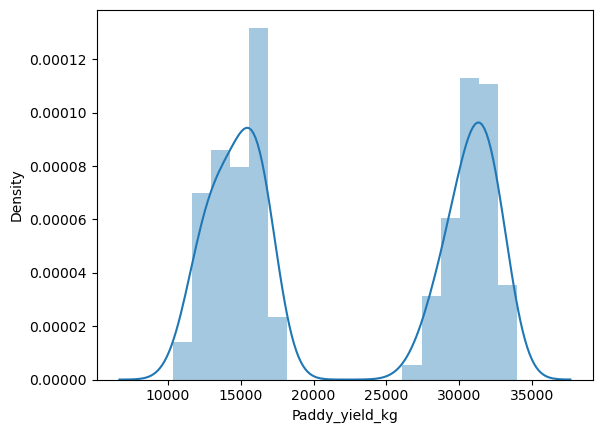

In [50]:
sns.distplot(train['Paddy_yield_kg'], kde = True)

In [51]:
input_variables = combined.drop('Paddy_yield_kg', axis = 1)

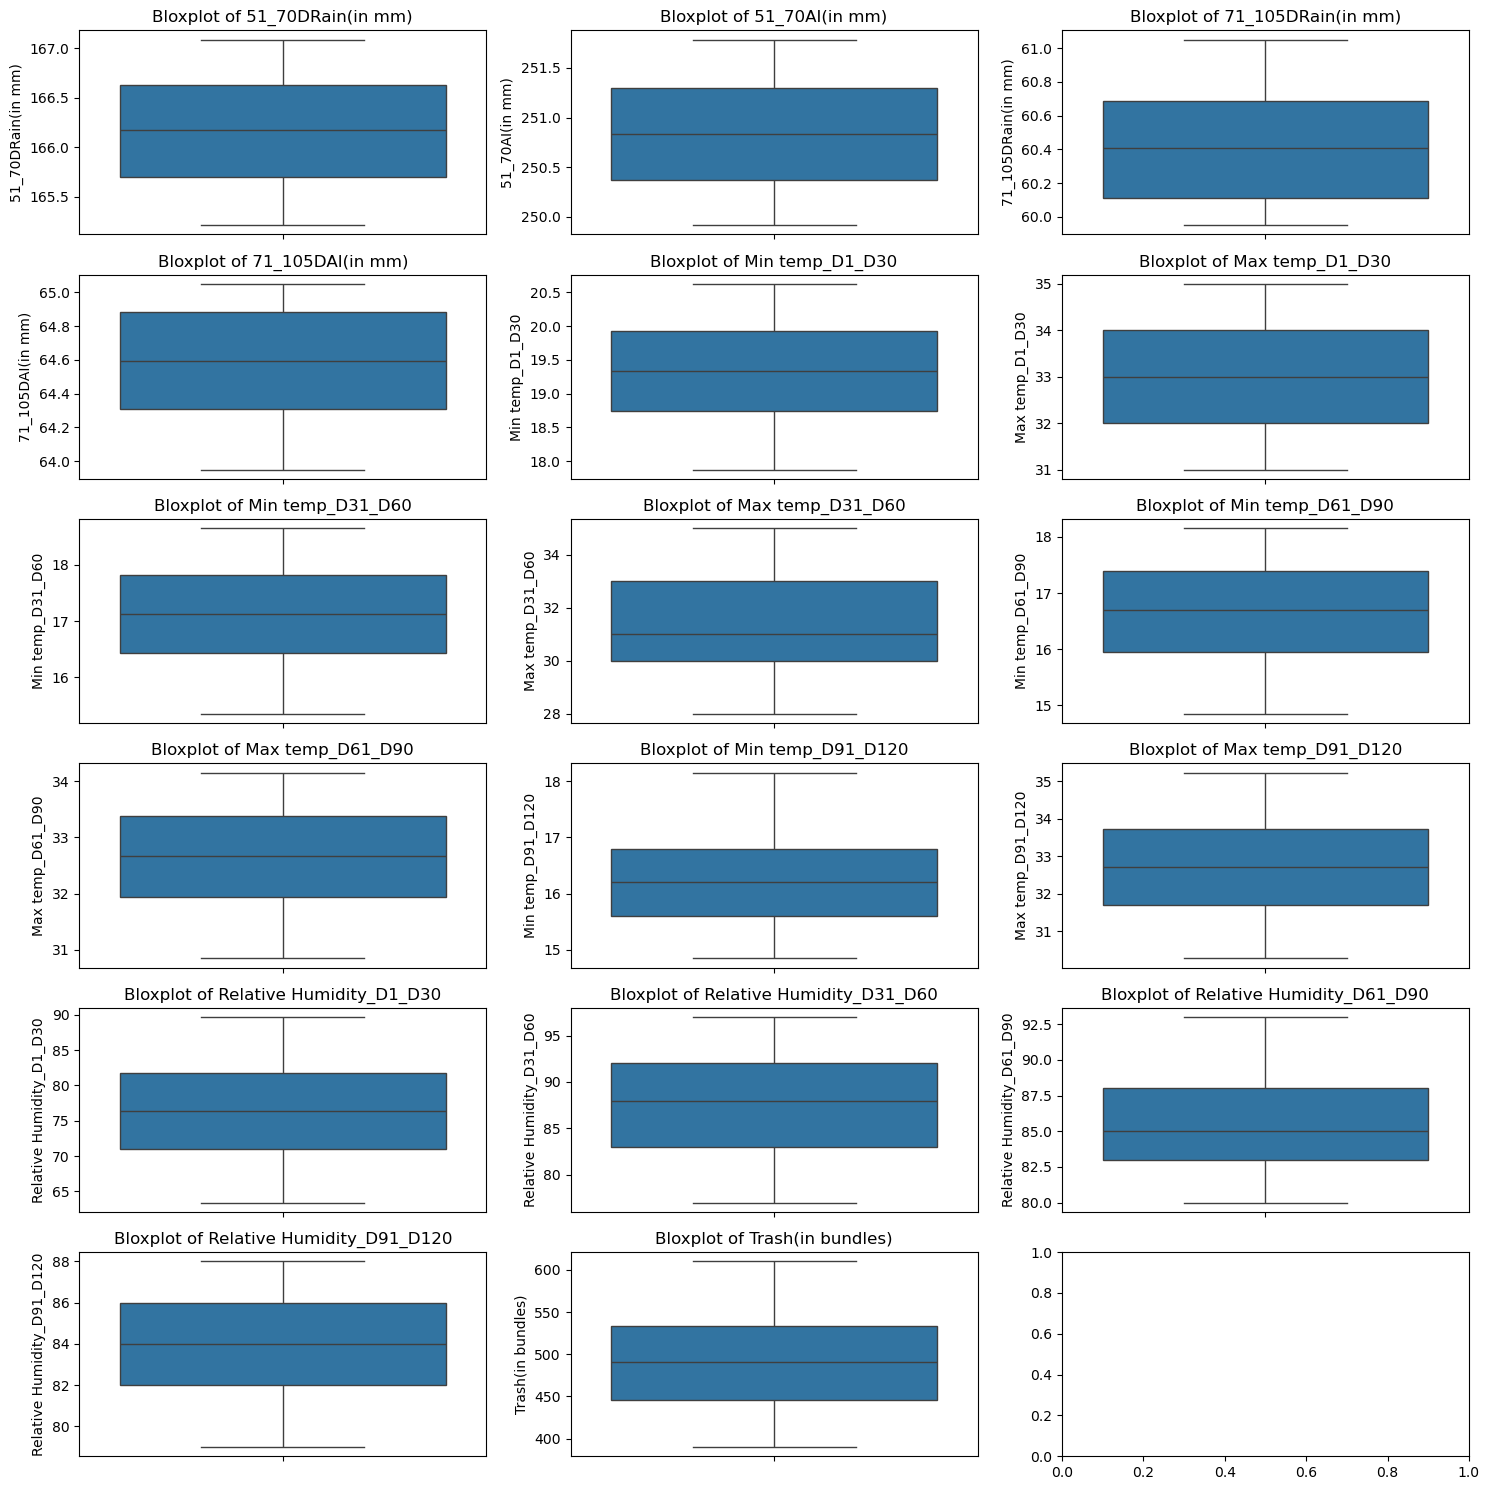

In [52]:
fig, axes = plt.subplots(6, 3, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(input_variables.columns):
    sns.boxplot(data = combined, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [67]:
def replace_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    median_value = df[column].median()
    df[column] = np.where((df[column]<lower)|(df[column]>upper), median_value, df[column])
    return df

In [69]:
for col in input_variables.columns:
    concat_df = replace_outliers(combined, col)

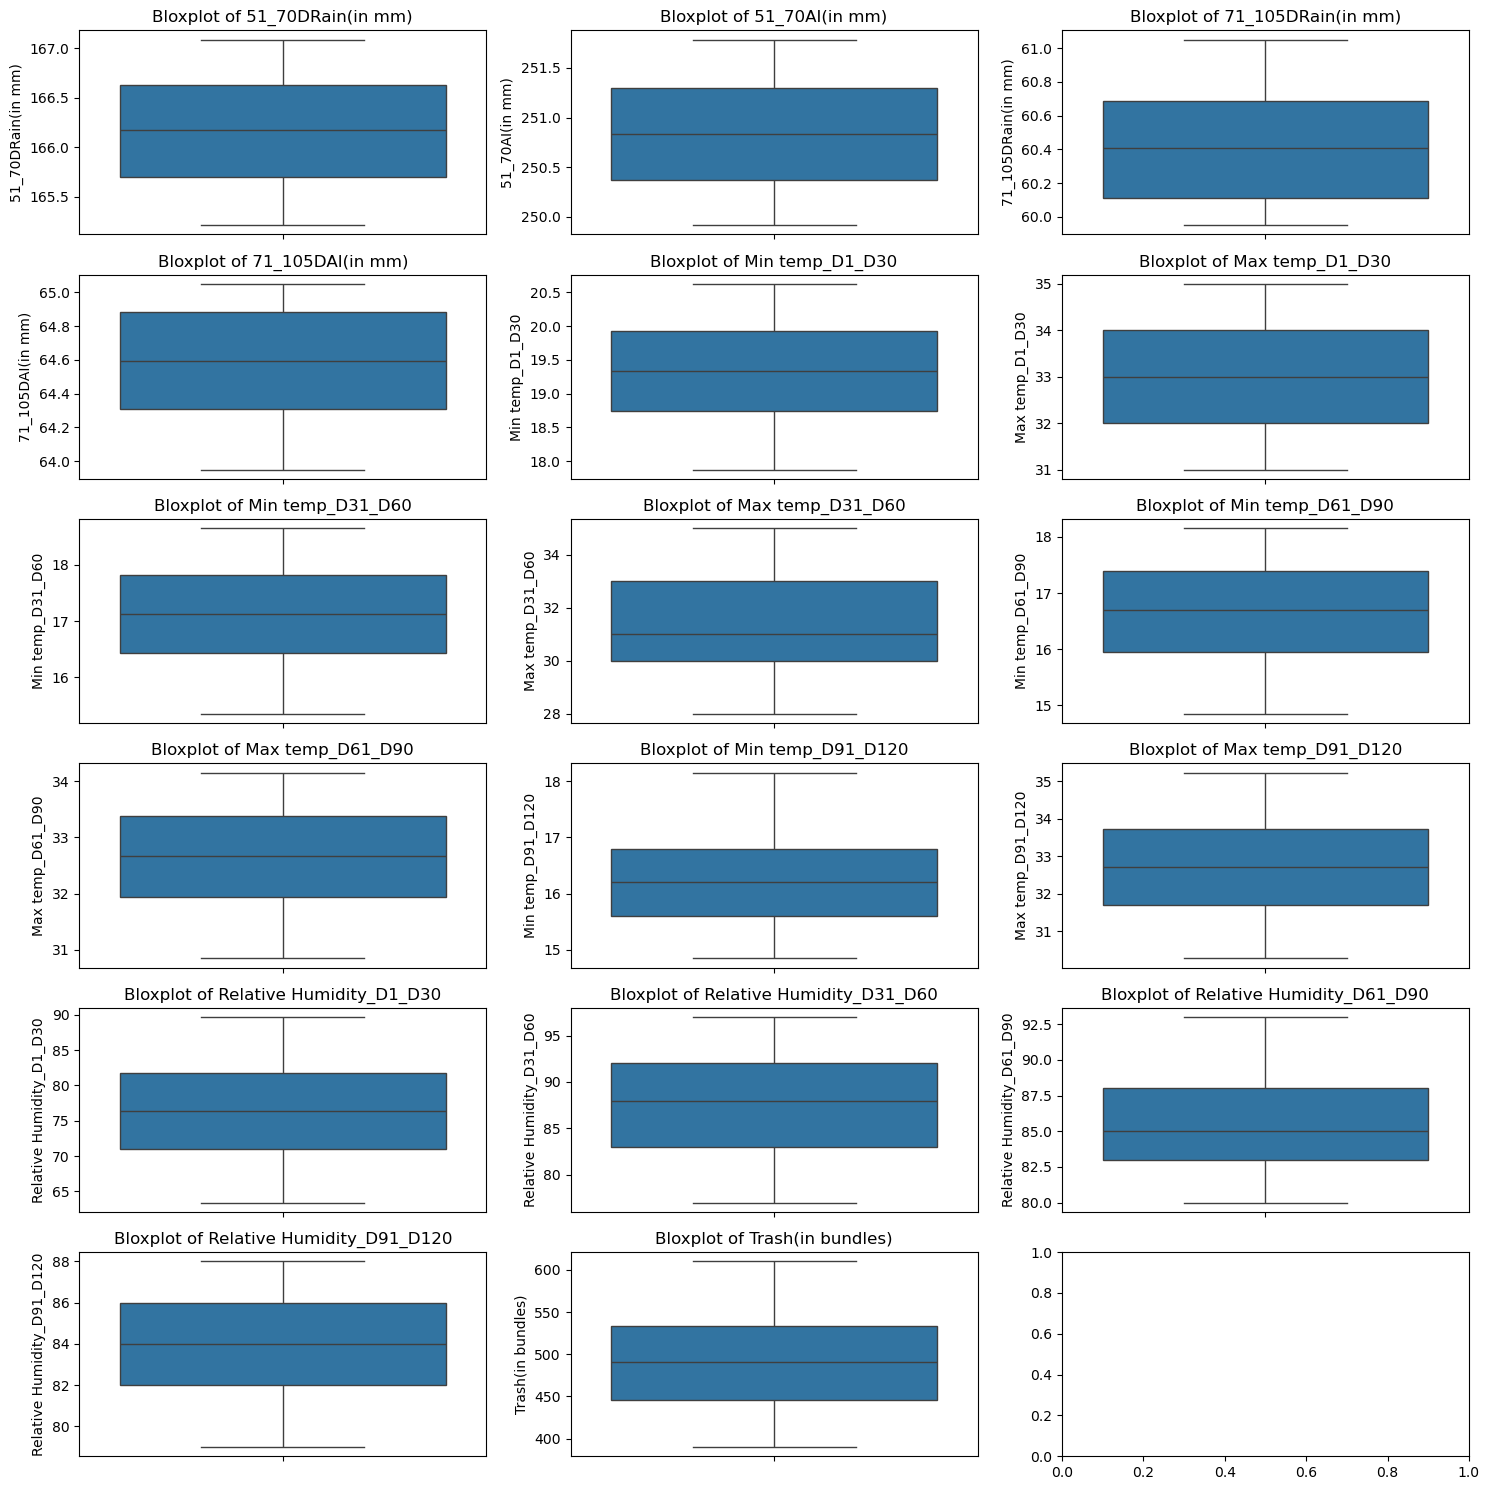

In [73]:
fig, axes = plt.subplots(6, 3, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(input_variables.columns):
    sns.boxplot(data = combined, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [75]:
newtrain = combined.iloc[0:14699, :]
newtest = combined.iloc[14699:, :].drop('Paddy_yield_kg', axis = 1)

In [77]:
newtrain.head()

,51_70DRain(in mm),51_70AI(in mm),71_105DRain(in mm),71_105DAI(in mm),Min temp_D1_D30,Max temp_D1_D30,Min temp_D31_D60,Max temp_D31_D60,Min temp_D61_D90,Max temp_D61_D90,Min temp_D91_D120,Max temp_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy_yield_kg
0,166.4060,250.3989,60.6070,64.7301,19.1209,32.0,18.5217,28.0,16.1045,32.3661,17.9962,34.4392,71.8335,87.0,86.0,88.0,488.0,31003.8054
1,166.0171,249.9784,61.0500,64.5133,20.4526,35.0,15.7756,30.0,16.4273,32.5855,16.0229,32.1528,63.4050,96.0,80.0,88.0,390.0,13975.0008
2,166.2646,250.1777,60.6294,65.0500,17.8750,32.0,16.5833,29.0,16.1818,33.4970,15.6185,32.9120,76.7676,93.0,93.0,83.0,514.0,16795.8723
3,166.5857,250.0593,60.4307,64.5409,19.1668,33.0,16.0980,29.0,16.1923,34.0925,17.6281,33.4071,63.4050,87.0,90.0,82.0,486.0,30855.5800
4,165.2734,250.1489,59.9500,64.1618,20.5478,35.0,16.9143,29.0,17.7099,32.8637,15.1444,34.7133,65.0587,81.0,92.0,80.0,494.0,15905.2960


In [79]:
newtrain.shape

(14699, 18)

In [81]:
newtest.shape

(300, 17)

In [83]:
X = newtrain.drop(columns=['Paddy_yield_kg'])
y = newtrain['Paddy_yield_kg']
k = 12  
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)
mask = selector.get_support()
selected_features = X.columns[mask]
print(f"Top {k} selected features:")
print(selected_features)

Top 12 selected features:
Index(['51_70DRain(in mm)', '51_70AI(in mm)', 'Min temp_D1_D30',
       'Max temp_D1_D30', 'Max temp_D31_D60', 'Min temp_D61_D90',
       'Max temp_D61_D90', 'Max temp_D91_D120', 'Relative Humidity_D1_D30',
       'Relative Humidity_D61_D90', 'Relative Humidity_D91_D120',
       'Trash(in bundles)'],
      dtype='object')


In [87]:
correlation_matrix = newtrain.corr()
target_corr = correlation_matrix["Paddy_yield_kg"].sort_values(ascending=False)
print(target_corr)

Paddy_yield_kg                1.000000
Trash(in bundles)             0.668573
Relative Humidity_D61_D90     0.029233
Relative Humidity_D1_D30      0.027994
51_70DRain(in mm)             0.010611
Max temp_D31_D60              0.010243
Max temp_D1_D30               0.006226
Relative Humidity_D91_D120    0.005933
Min temp_D91_D120             0.001955
Min temp_D31_D60              0.000231
71_105DRain(in mm)           -0.000776
71_105DAI(in mm)             -0.001165
Relative Humidity_D31_D60    -0.003077
51_70AI(in mm)               -0.007129
Max temp_D61_D90             -0.010397
Max temp_D91_D120            -0.012379
Min temp_D61_D90             -0.012384
Min temp_D1_D30              -0.012620
Name: Paddy_yield_kg, dtype: float64


In [89]:
x = newtrain[['51_70DRain(in mm)', '51_70AI(in mm)', 'Min temp_D1_D30',
       'Max temp_D1_D30', 'Max temp_D31_D60', 'Min temp_D61_D90',
       'Max temp_D61_D90', 'Max temp_D91_D120', 'Relative Humidity_D1_D30',
       'Relative Humidity_D61_D90', 'Relative Humidity_D91_D120',
       'Trash(in bundles)']]
y = newtrain['Paddy_yield_kg']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [93]:
models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor(), 'lasso': Lasso(), 'ridge' : Ridge()}

In [95]:
def evaluate_models(x_train, x_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(x_train, y_train).predict(x_test)
        accuracy = r2_score(y_test, predictions)
        results[name] = accuracy
    return results

In [97]:
results = evaluate_models(x_train, x_test, y_train, y_test, models)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 11759, number of used features: 12
[LightGBM] [Info] Start training from score 22242.078969


In [98]:
best_model_name = max(results, key = results.get)
best_model = models[best_model_name]

In [99]:
print(f"best model is {best_model_name} with r2_square {results[best_model_name]}")

best model is LightGBM with r2_square 0.9978183481439545


In [100]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 11759, number of used features: 12
[LightGBM] [Info] Start training from score 22242.078969


In [101]:
print(r2_score(y_test, y_pred))

0.9978183481439545


In [109]:
x_train = newtrain[['51_70DRain(in mm)', '51_70AI(in mm)', 'Min temp_D1_D30',
       'Max temp_D1_D30', 'Max temp_D31_D60', 'Min temp_D61_D90',
       'Max temp_D61_D90', 'Max temp_D91_D120', 'Relative Humidity_D1_D30',
       'Relative Humidity_D61_D90', 'Relative Humidity_D91_D120',
       'Trash(in bundles)']]
y_train = newtrain['Paddy_yield_kg']
x_test = newtest[['51_70DRain(in mm)', '51_70AI(in mm)', 'Min temp_D1_D30',
       'Max temp_D1_D30', 'Max temp_D31_D60', 'Min temp_D61_D90',
       'Max temp_D61_D90', 'Max temp_D91_D120', 'Relative Humidity_D1_D30',
       'Relative Humidity_D61_D90', 'Relative Humidity_D91_D120',
       'Trash(in bundles)']]
y_pred = best_model.fit(x_train, y_train).predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 14699, number of used features: 12
[LightGBM] [Info] Start training from score 22242.749359


In [111]:
solution = pd.DataFrame({'Paddy_yield_kg': y_pred})
solution.head()

,Paddy_yield_kg
0,13444.209285
1,30758.408842
2,14111.523130
3,32466.290225
4,12512.402683


In [113]:
solution.to_csv('Solution.csv', index = False)